In [1]:
import pandas as pd
import numpy as np
from covid import Covid

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
world_total = data[data["location"]=="World"]

In [126]:
world_total.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
85662,OWID_WRL,NaN,World,2021-05-04,154359533.0,807436.0,806094.429,3227598.0,13960.0,13215.429,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85663,OWID_WRL,NaN,World,2021-05-05,155200532.0,840999.0,796809.714,3241798.0,14200.0,12998.429,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85664,OWID_WRL,NaN,World,2021-05-06,156070356.0,869824.0,792841.429,3256037.0,14239.0,12891.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85665,OWID_WRL,NaN,World,2021-05-07,156901680.0,831324.0,786028.571,3269856.0,13819.0,12827.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
85666,OWID_WRL,NaN,World,2021-05-08,157688226.0,786546.0,784581.000,3283031.0,13175.0,12915.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [7]:
covid = Covid(source="worldometers")

In [8]:
world_today = covid.get_total_confirmed_cases()

In [9]:
world_today

158579824

## Run From Here if Problem Occures

In [166]:
world = world_total["total_cases"]

In [167]:
world = pd.DataFrame(world)

In [168]:
world

,total_cases
85194,557.0
85195,655.0
85196,941.0
85197,1433.0
85198,2118.0
...,...
85662,154359533.0
85663,155200532.0
85664,156070356.0
85665,156901680.0


In [169]:
world.loc[len(world.index)] = [world_today]

In [170]:
world.insert(0, 'id', range(0, 0 + len(world)))

In [171]:
world = world.tail(30)
world

,id,total_cases
85638,444,135355887.0
85639,445,136046628.0
85640,446,136663253.0
85641,447,137442820.0
85642,448,138259845.0
85643,449,139076606.0
85644,450,139931461.0
85645,451,140719503.0
85646,452,141404998.0
85647,453,142098420.0


In [172]:
world.reset_index(drop=True, inplace=True)
world

,id,total_cases
0,444,135355887.0
1,445,136046628.0
2,446,136663253.0
3,447,137442820.0
4,448,138259845.0
5,449,139076606.0
6,450,139931461.0
7,451,140719503.0
8,452,141404998.0
9,453,142098420.0


In [173]:
x = np.array(world['id']).reshape(-1,1)
y = np.array(world['total_cases']).reshape(-1,1)

<IPython.core.display.Javascript object>


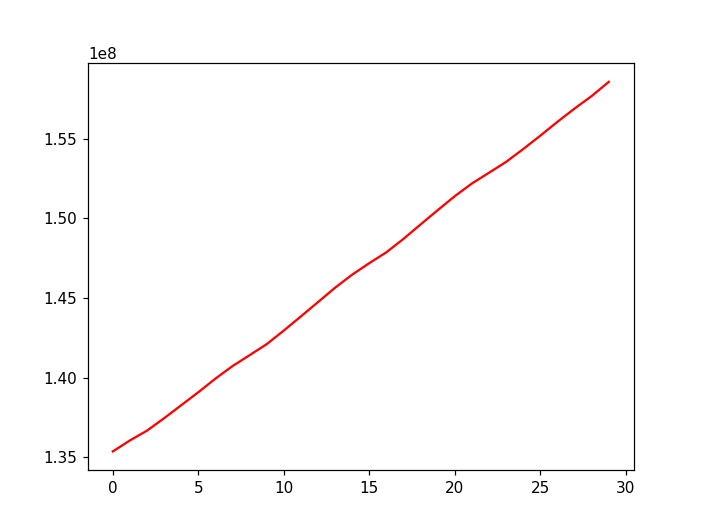

In [204]:
%matplotlib notebook
plt.plot(y, "-r") 

In [175]:
polyworld = PolynomialFeatures(degree=2)
x = polyworld.fit_transform(x)

In [176]:
x

array([[1.00000e+00, 4.44000e+02, 1.97136e+05],
       [1.00000e+00, 4.45000e+02, 1.98025e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.47000e+02, 1.99809e+05],
       [1.00000e+00, 4.48000e+02, 2.00704e+05],
       [1.00000e+00, 4.49000e+02, 2.01601e+05],
       [1.00000e+00, 4.50000e+02, 2.02500e+05],
       [1.00000e+00, 4.51000e+02, 2.03401e+05],
       [1.00000e+00, 4.52000e+02, 2.04304e+05],
       [1.00000e+00, 4.53000e+02, 2.05209e+05],
       [1.00000e+00, 4.54000e+02, 2.06116e+05],
       [1.00000e+00, 4.55000e+02, 2.07025e+05],
       [1.00000e+00, 4.56000e+02, 2.07936e+05],
       [1.00000e+00, 4.57000e+02, 2.08849e+05],
       [1.00000e+00, 4.58000e+02, 2.09764e+05],
       [1.00000e+00, 4.59000e+02, 2.10681e+05],
       [1.00000e+00, 4.60000e+02, 2.11600e+05],
       [1.00000e+00, 4.61000e+02, 2.12521e+05],
       [1.00000e+00, 4.62000e+02, 2.13444e+05],
       [1.00000e+00, 4.63000e+02, 2.14369e+05],
       [1.00000e+00, 4.64000e+02, 2.1529

In [177]:
world_model = linear_model.LinearRegression()
world_model.fit(x, y)
word_accuracy = world_model.score(x,y)
f"Accuracy = {round(word_accuracy*100,3)}%"

'Accuracy = 99.977%'

In [178]:
world_predict_all = world_model.predict(x)

<IPython.core.display.Javascript object>


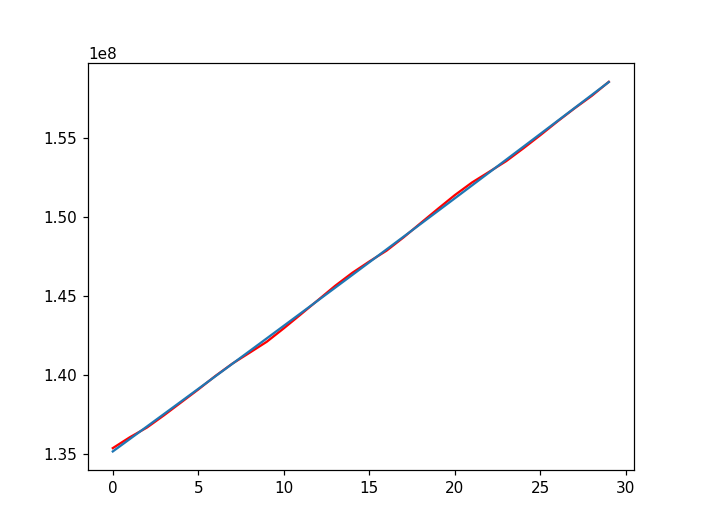

In [179]:
%matplotlib notebook
plt.plot(y, "-r") 
plt.plot(world_predict_all)

In [180]:
world_last_day = int(world.tail(1)["id"])+1
world_last_day

474

In [181]:
ww = polyworld.fit_transform([[world_last_day]])
ww

array([[1.00000e+00, 4.74000e+02, 2.24676e+05]])

In [182]:
world_predict = int(world_model.predict(ww))
world_predict

159392992

In [183]:
import requests
from bs4 import BeautifulSoup

In [184]:
full_page = requests.get("https://www.worldometers.info/coronavirus/")

In [185]:
full_page = full_page.content

In [186]:
soup = BeautifulSoup(full_page)

In [187]:
world_o = soup.find_all("tr", {"class": "total_row_world"})[7]

In [188]:
type(world_o)

bs4.element.Tag

In [189]:
world_o.find_all("td")[2].text[:].replace(',', '')

'158579841'

In [190]:
world_o.find_all("td")[3].text[1:].replace(',', '')

'269231'

In [191]:
int(world_o.find_all("td")[7].text[1:].replace(',', ''))

285714

In [192]:
country_o = soup.find_all("table", {"class": "table-hover"})[0]

In [193]:
country_o

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [194]:
country_o=(country_o.find_all("tr"))

In [195]:
type(country_o)

bs4.element.ResultSet

In [196]:
country_o[7]

<tr class="total_row_world row_continent" data-continent="" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr></nobr>
</td>
<td>721</td>
<td></td>
<td>15</td>
<td></td>
<td>706</td>
<td></td>
<td>0</td>
<td>0</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="" style="display:none;"></td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [197]:
country_o[41].find_all("td")[7].text.replace("+","").replace(",","")

'3329'

In [198]:
counter = 0
empty_dataframe = []
for n in country_o:
    if n.find(["nobr", "a", "span"]) != None:
        empty_dataframe.append([counter,(n.find(["nobr", "a", "span"]).text).upper()])
        print(counter,n.find(["nobr", "a", "span"]).text)
    counter+=1
print(counter)
print(empty_dataframe)

0 1M pop
1 North America
2 Asia
3 South America
4 Europe
5 Africa
6 Oceania
7 
9 USA
10 India
11 Brazil
12 France
13 Turkey
14 Russia
15 UK
16 Italy
17 Spain
18 Germany
19 Argentina
20 Colombia
21 Poland
22 Iran
23 Mexico
24 Ukraine
25 Peru
26 Indonesia
27 Czechia
28 South Africa
29 Netherlands
30 Canada
31 Chile
32 Iraq
33 Philippines
34 Romania
35 Belgium
36 Sweden
37 Pakistan
38 Portugal
39 Israel
40 Hungary
41 Bangladesh
42 Jordan
43 Serbia
44 Switzerland
45 Japan
46 Austria
47 UAE
48 Lebanon
49 Morocco
50 Malaysia
51 Saudi Arabia
52 Bulgaria
53 Ecuador
54 Nepal
55 Slovakia
56 Belarus
57 Panama
58 Greece
59 Croatia
60 Kazakhstan
61 Azerbaijan
62 Georgia
63 Tunisia
64 Bolivia
65 Palestine
66 Paraguay
67 Kuwait
68 Dominican Republic
69 Costa Rica
70 Ethiopia
71 Denmark
72 Lithuania
73 Moldova
74 Ireland
75 Slovenia
76 Egypt
77 Guatemala
78 Honduras
79 Armenia
80 Uruguay
81 Qatar
82 Venezuela
83 Oman
84 Bosnia and Herzegovina
85 Bahrain
86 Libya
87 Nigeria
88 Kenya
89 North Macedonia


In [199]:
c_scapped = pd.DataFrame(empty_dataframe)
c_scapped.columns=["C_ID","C_Name"]
c_scapped

,C_ID,C_Name
0,0,1M POP
1,1,NORTH AMERICA
2,2,ASIA
3,3,SOUTH AMERICA
4,4,EUROPE
...,...,...
225,226,MARSHALL ISLANDS
226,227,SAMOA
227,228,SAINT HELENA
228,229,MICRONESIA


In [200]:
C_ID_Selected = int(c_scapped[c_scapped["C_Name"]=="BANGLADESH"]["C_ID"])
C_ID_Selected

41

In [201]:
countries = covid.list_countries()
country = pd.DataFrame(countries, columns=["country"])
country = country[7:]

In [202]:
country.reset_index(drop=True, inplace=True)

In [203]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(country)

                    country
0                     world
1                       usa
2                     india
3                    brazil
4                    france
5                    turkey
6                    russia
7                        uk
8                     italy
9                     spain
10                  germany
11                argentina
12                 colombia
13                   poland
14                     iran
15                   mexico
16                  ukraine
17                     peru
18                indonesia
19                  czechia
20             south africa
21              netherlands
22                   canada
23                    chile
24                     iraq
25              philippines
26                  romania
27                  belgium
28                   sweden
29                 pakistan
30                 portugal
31                   israel
32                  hungary
33               bangladesh
34                  